In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('[Final]Total_csv.csv',sep='\t')

In [46]:
best_df = df[['FR_url','Question_count','First_ratio','Second_ratio','Tag_count','pos_ratio',
 'neg_ratio','subjectivity','polarity','senti_diffs_per_ref','Sticker_count','Text_len','Count_space_mistake',
   'effort_ratio','effort_img_ratio','Left','Center','Right','Justify',
   'img img img img img','img img img img text','img img img text img','img img text img img','img img text img text',
 'img text img img img','img text img img text','img text img text img','text img img img img','text img img img text',
 'text img img text img','text img text img img','text img text img text','Credibility']]

In [47]:
best_df.shape

(16304, 33)

In [48]:
best_df = best_df.dropna()

In [24]:
from sklearn.utils import shuffle
best_df = shuffle(best_df)

In [25]:
Credibility = best_df[best_df['Credibility']==1]
Non_credibility = best_df[best_df['Credibility']==0]

# Credibility data shuffle

In [26]:
from sklearn.utils import shuffle
Credibility = shuffle(Credibility)
Credibility = Credibility.iloc[:6289]

In [27]:
Credibility.shape
Non_credibility.shape

(6289, 33)

In [28]:
merge_df = pd.concat([Credibility,Non_credibility])

In [29]:
merge_df.groupby(['Credibility'])['Credibility'].count()

Credibility
0    6289
1    6289
Name: Credibility, dtype: int64

In [30]:
from sklearn.utils import shuffle
merge_df = shuffle(merge_df)

# Drop na

In [31]:
merge_df = merge_df.dropna()

# x, y selection

In [32]:
x = merge_df.drop(columns=['Credibility'])
y = merge_df[['Credibility']]

In [33]:
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# K-means Clustering

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=5)
pipeline = make_pipeline(scaler,model)
pipeline.fit(x)
predict = pd.DataFrame(pipeline.predict(x))

In [35]:
predict.columns = ['predict']

In [36]:
y = y.reset_index(drop=True)

In [37]:
ct = pd.crosstab(y['Credibility'],predict['predict'])

In [38]:
ct.loc['total'] = ct.select_dtypes(pd.np.number).sum()

In [39]:
ct

predict,0,1,2,3,4
Credibility,,,,,
0,249,4556,1,383,1100
1,1911,2642,0,821,915
total,2160,7198,1,1204,2015


In [40]:
ct.iloc [0] = ct.iloc[0] / ct.iloc[2]
ct.iloc [1] = ct.iloc[1] / ct.iloc[2]
ct

predict,0,1,2,3,4
Credibility,,,,,
0,0.115278,0.632954,1.0,0.318106,0.545906
1,0.884722,0.367046,0.0,0.681894,0.454094
total,2160.000000,7198.000000,1.0,1204.000000,2015.000000


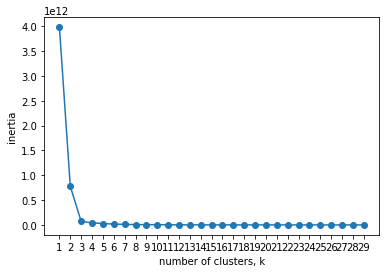

In [41]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# 각 Group 비교하기

## Standard scaler

In [57]:
col_name = x.columns.tolist()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
scaled_x_df = pd.DataFrame(scaled_x)
scaled_x_df.columns = col_name

In [58]:
scaled_x_structure = scaled_x_df[['img img img img img',
 'img img img img text',
 'img img img text img',
 'img img text img img',
 'img img text img text',
 'img text img img img',
 'img text img img text',
 'img text img text img',
 'text img img img img',
 'text img img img text',
 'text img img text img',
 'text img text img img',
 'text img text img text']]

In [59]:
df_analysis = pd.concat([scaled_x_structure,predict,y],axis=1)

In [60]:
df_0 = df_analysis[df_analysis['predict']==0]
df_1 = df_analysis[df_analysis['predict']==1]
df_2 = df_analysis[df_analysis['predict']==2]
df_3 = df_analysis[df_analysis['predict']==3]
df_4 = df_analysis[df_analysis['predict']==4]

In [61]:
df_0 = df_0.drop(columns=['Credibility','predict'])
df_1 = df_1.drop(columns=['Credibility','predict'])
df_2 = df_2.drop(columns=['Credibility','predict'])
df_3 = df_3.drop(columns=['Credibility','predict'])
df_4 = df_4.drop(columns=['Credibility','predict'])

# Python Radar chart - Structure

In [62]:
import matplotlib.pyplot as plt
from math import pi

In [63]:
df_0_mean = df_0.describe().iloc[1]
df_1_mean = df_1.describe().iloc[1]
df_2_mean = df_2.describe().iloc[1]
df_3_mean = df_3.describe().iloc[1]

In [64]:
df_0 = pd.DataFrame(df_0_mean).T
df_1 = pd.DataFrame(df_1_mean).T
df_2 = pd.DataFrame(df_2_mean).T
df_3 = pd.DataFrame(df_3_mean).T

In [65]:
Total_df = pd.concat([df_0,df_1,df_2,df_3])

In [66]:
predict_col = pd.DataFrame({'predict':[1,2,3,4]})
Total_df['predict'] = [1,2,3,4]

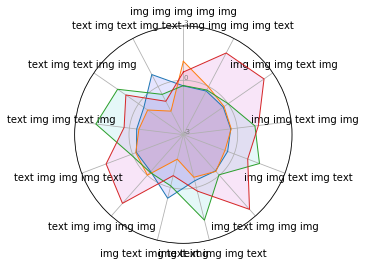

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Create background
 
# number of variable
categories=list(Total_df)[:-1]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-3,0,3], ["-3","0","3"], color="grey", size=7)
plt.ylim(-3,3)
 
 
# # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values = Total_df.iloc[0].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values= Total_df.iloc[1].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values= Total_df.iloc[2].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'c', alpha=0.1)

# Ind4
values= Total_df.iloc[3].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'm', alpha=0.1)

# Python Radar chart - Sentiment

In [68]:
scaled_x_sentiment = scaled_x_df[['pos_ratio',
 'neg_ratio',
 'subjectivity',
 'polarity',
 'senti_diffs_per_ref',]]

In [69]:
df_analysis = pd.concat([scaled_x_sentiment,predict,y],axis=1)

In [70]:
df_0 = df_analysis[df_analysis['predict']==0]
df_1 = df_analysis[df_analysis['predict']==1]
df_2 = df_analysis[df_analysis['predict']==2]
df_3 = df_analysis[df_analysis['predict']==3]
df_4 = df_analysis[df_analysis['predict']==4]

In [71]:
df_0 = df_0.drop(columns=['Credibility','predict'])
df_1 = df_1.drop(columns=['Credibility','predict'])
df_2 = df_2.drop(columns=['Credibility','predict'])
df_3 = df_3.drop(columns=['Credibility','predict'])
df_4 = df_4.drop(columns=['Credibility','predict'])

In [72]:
import matplotlib.pyplot as plt
from math import pi

In [73]:
df_0_mean = df_0.describe().iloc[1]
df_1_mean = df_1.describe().iloc[1]
df_2_mean = df_2.describe().iloc[1]
df_3_mean = df_3.describe().iloc[1]

In [74]:
df_0 = pd.DataFrame(df_0_mean).T
df_1 = pd.DataFrame(df_1_mean).T
df_2 = pd.DataFrame(df_2_mean).T
df_3 = pd.DataFrame(df_3_mean).T

In [75]:
Total_df = pd.concat([df_0,df_1,df_2,df_3])

In [76]:
predict_col = pd.DataFrame({'predict':[1,2,3,4]})
Total_df['predict'] = [1,2,3,4]

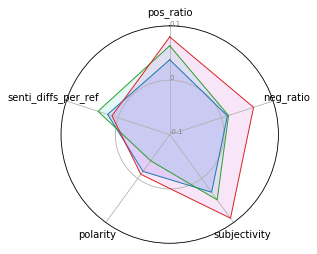

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Create background
 
# number of variable
categories=list(Total_df)[:-1]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-0.2,0,0.2], ["-0.1","0","0.1"], color="grey", size=7)
plt.ylim(-0.2,0.2)
 
 
# # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values = Total_df.iloc[0].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values= Total_df.iloc[1].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values= Total_df.iloc[2].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'c', alpha=0.1)

# Ind4
values= Total_df.iloc[3].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'm', alpha=0.1)

# Python Radar chart - Others

In [86]:
scaled_x_others = scaled_x_df[['FR_url',
 'Question_count',
 'First_ratio',
 'Second_ratio',
 'Tag_count',
'Sticker_count',
 'Text_len',
 'Count_space_mistake',
 'effort_ratio',
 'effort_img_ratio',
 'Left',
 'Center',
 'Right',
 'Justify']]

In [87]:
df_analysis = pd.concat([scaled_x_others,predict,y],axis=1)

In [88]:
df_0 = df_analysis[df_analysis['predict']==0]
df_1 = df_analysis[df_analysis['predict']==1]
df_2 = df_analysis[df_analysis['predict']==2]
df_3 = df_analysis[df_analysis['predict']==3]
df_4 = df_analysis[df_analysis['predict']==4]

In [89]:
df_0 = df_0.drop(columns=['Credibility','predict'])
df_1 = df_1.drop(columns=['Credibility','predict'])
df_2 = df_2.drop(columns=['Credibility','predict'])
df_3 = df_3.drop(columns=['Credibility','predict'])
df_4 = df_4.drop(columns=['Credibility','predict'])

In [90]:
import matplotlib.pyplot as plt
from math import pi

In [91]:
df_0_mean = df_0.describe().iloc[1]
df_1_mean = df_1.describe().iloc[1]
df_2_mean = df_2.describe().iloc[1]
df_3_mean = df_3.describe().iloc[1]

In [92]:
df_0 = pd.DataFrame(df_0_mean).T
df_1 = pd.DataFrame(df_1_mean).T
df_2 = pd.DataFrame(df_2_mean).T
df_3 = pd.DataFrame(df_3_mean).T

In [93]:
Total_df = pd.concat([df_0,df_1,df_2,df_3])

In [94]:
predict_col = pd.DataFrame({'predict':[1,2,3,4]})
Total_df['predict'] = [1,2,3,4]

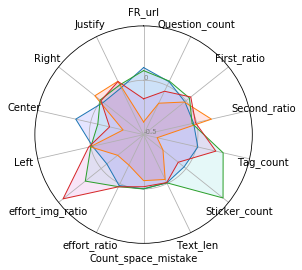

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Create background
 
# number of variable
categories=list(Total_df)[:-1]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-0.5,0,5], ["-0.5","0","0.5"], color="grey", size=7)
plt.ylim(-0.5,0.5)
 
 
# # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values = Total_df.iloc[0].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values= Total_df.iloc[1].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values= Total_df.iloc[2].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'c', alpha=0.1)

# Ind4
values= Total_df.iloc[3].drop('predict').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'm', alpha=0.1)